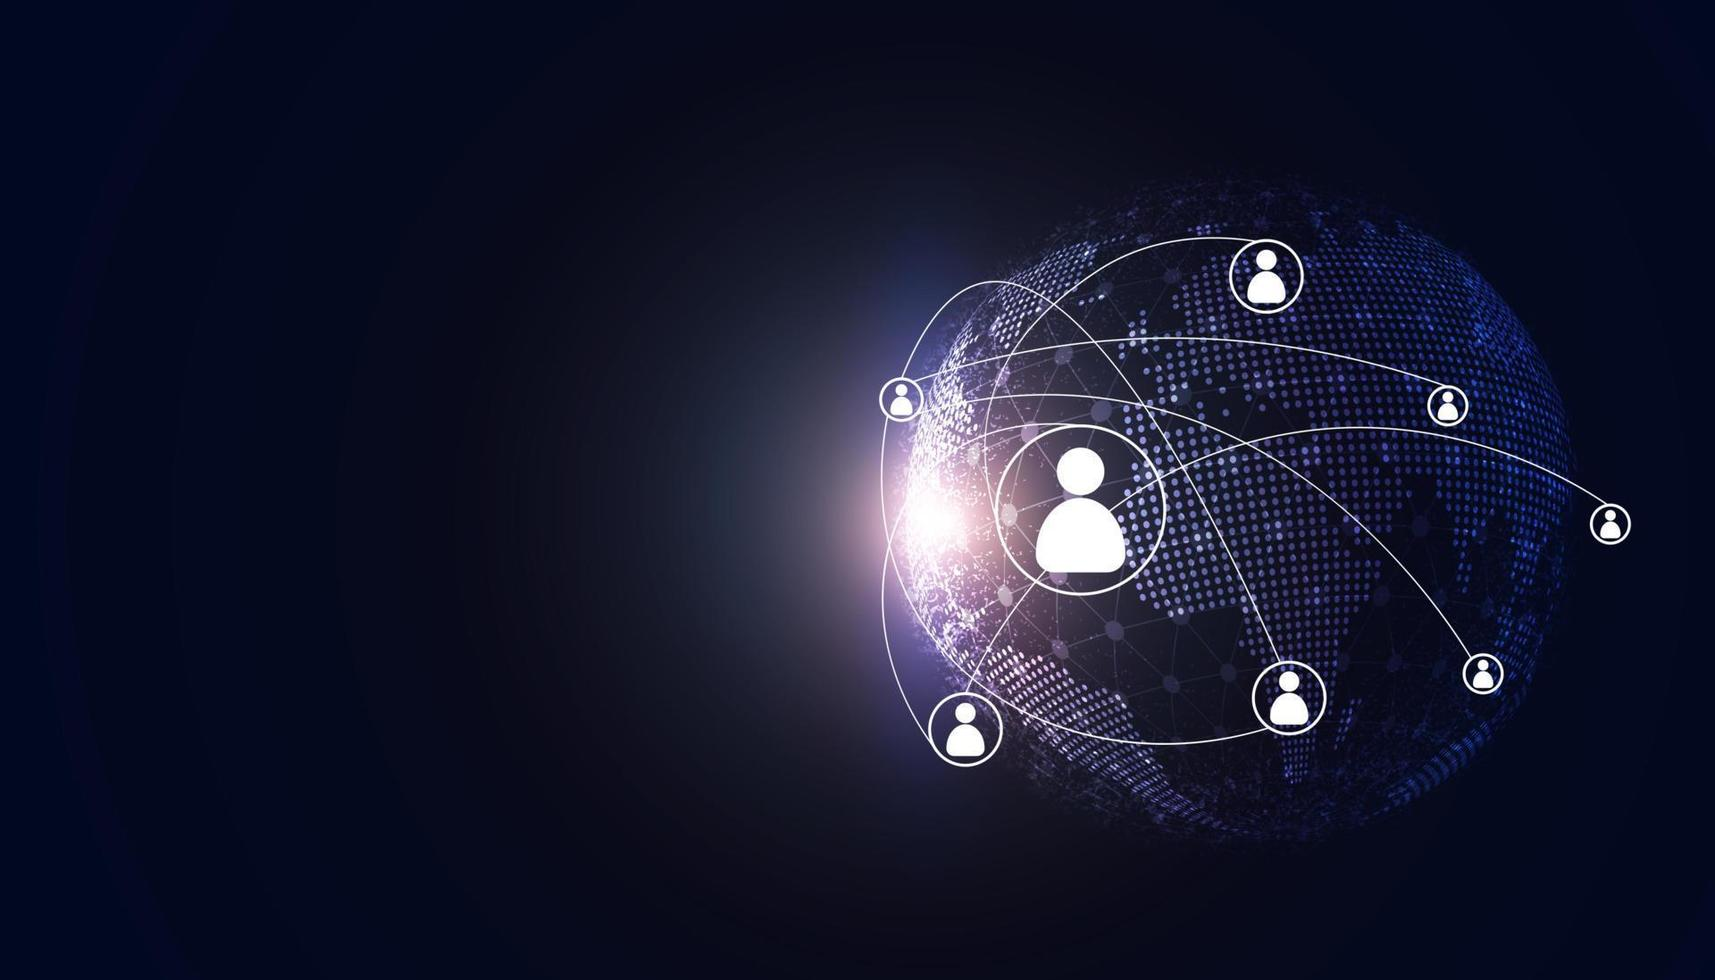
# **Ø The program focuses on analyzing the Astro-Physics collaboration network by leveraging graph theory and network analysis techniques. It processes the dataset, represented as an edge list, to perform comprehensive exploration and analysis. The key objectives are as follows:**


*    Compute Node Degree and Average Degree
*    Explore Graph Representations
*    Calculate Centrality Measures
*    Analyze Clustering Coefficients
*    Determine Shortest Paths
*    Community Detection and Visualization










In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from networkx.algorithms.centrality import betweenness_centrality, closeness_centrality, eigenvector_centrality
from networkx.algorithms import community


# **Import data**

In [187]:
graph = nx.read_edgelist("CA-AstroPh.txt", nodetype=int)



# **Calculate and display basic graph properties**

In [188]:
# Calculate and display basic graph properties
total_nodes = graph.number_of_nodes()
total_edges = graph.number_of_edges()
avg_degree = sum(dict(graph.degree()).values()) / total_nodes

In [189]:
print(f"Graph Summary:")
print(f"Nodes: {total_nodes}")
print(f"Edges: {total_edges}")
print(f"Average Degree: {avg_degree:.2f}")

Graph Summary:
Nodes: 18772
Edges: 198110
Average Degree: 21.11


In [190]:
# Check if the graph is connected
is_connected = nx.is_connected(graph)
print("\nIs the graph connected?", is_connected, "\n")


Is the graph connected? False 



In [191]:
# Check if graph is directed
if nx.is_directed(graph):
    print("The graph is directed.")
else:
    print("The graph is undirected.")

The graph is undirected.


# **Create adjacency matrix , edge list, adjacency list**

In [192]:
# Create adjacency matrix
adj_matrix = nx.adjacency_matrix(graph).todense()

In [193]:
# Set printing options for large matrices
np.set_printoptions(threshold=100, linewidth=150, edgeitems=15)

In [194]:
print("\nAdjacency Matrix:")
print(adj_matrix)


Adjacency Matrix:
[[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ... 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 ... 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0

In [195]:
# Retrieve and display first few edges of the edge list
edges = list(graph.edges())
print("\nEdge List (first 10 edges):")
print(edges[:10])


Edge List (first 10 edges):
[(84424, 276), (84424, 1662), (84424, 5089), (84424, 6058), (84424, 6229), (84424, 10639), (84424, 16442), (84424, 19325), (84424, 19834), (84424, 20113)]


In [196]:
# Retrieve and display adjacency list for first 10 nodes
adj_list = {node: list(neighbors) for node, neighbors in graph.adjacency()}
print("\nAdjacency List (first 10 nodes):")
for node, neighbors in list(adj_list.items())[:10]:
    print(f"{node}: {neighbors}")


Adjacency List (first 10 nodes):
84424: [276, 1662, 5089, 6058, 6229, 10639, 16442, 19325, 19834, 20113, 21937, 25452, 26902, 29829, 30222, 32432, 33040, 39238, 39521, 41418, 45009, 45098, 45242, 47005, 47968, 47999, 49934, 50220, 50897, 51730, 53681, 57537, 58458, 59326, 61571, 63552, 64124, 64568, 66200, 69839, 72391, 73543, 76259, 77098, 77915, 78627, 83560, 85420, 88768, 89131, 89308, 89994, 90506, 91060, 92387, 93296, 94138, 94329, 95070, 95531, 96570, 97101, 98506, 99104, 104802, 106611, 107829, 109016, 112605, 117751, 122908, 124023, 125190, 130825, 132445]
276: [84424, 284, 1808, 5462, 7919, 10184, 20113, 25665, 43892, 46532, 53681, 53838, 55424, 58132, 58458, 61009, 63552, 65838, 66200, 72941, 86595, 92093, 97101, 98944, 109819, 116397, 116478, 118452, 125189, 130825, 131091]
1662: [84424, 52682, 110902, 30828, 54746, 128598, 11257, 61290, 33040, 127302, 97101, 3393, 6908, 10341, 11513, 24798, 26413, 30664, 32559, 36528, 38595, 43697, 53609, 54131, 54856, 56381, 56494, 59801,

In [197]:
# Convert adjacency list into a DataFrame
adj_list_df = pd.DataFrame(
    [(node, ", ".join(map(str, neighbors))) for node, neighbors in adj_list.items()],
    columns=["Node", "Neighbors"]
)
print("\nAdjacency List as DataFrame:")
print(adj_list_df.head())


Adjacency List as DataFrame:
    Node                                          Neighbors
0  84424  276, 1662, 5089, 6058, 6229, 10639, 16442, 193...
1    276  84424, 284, 1808, 5462, 7919, 10184, 20113, 25...
2   1662  84424, 52682, 110902, 30828, 54746, 128598, 11...
3   5089                                       84424, 97101
4   6058  84424, 101811, 121399, 83560, 10479, 80988, 10...


# **Select a random subset of nodes for Analysis**

In [237]:
# Select a random subset of nodes for visualization
num_sample_nodes = 500
sample_nodes = list(graph.nodes())[:num_sample_nodes]
subgraph = graph.subgraph(sample_nodes)

# **Node Degree Table**

In [216]:
# Calculate the edge count (degree) and degree centrality for each node
edge_count = dict(subgraph.degree())
degree_centrality = nx.degree_centrality(subgraph)

# Create a DataFrame to display the results as a table
table = pd.DataFrame({
    "Node": list(edge_count.keys()),
    "Edge Count": list(edge_count.values()),
    "Degree Centrality": [degree_centrality[node] for node in edge_count.keys()]
}).head(20)

# Print the table
print("\nNode Degree Table:")
print(table.to_string(index=False))


Node Degree Table:
  Node  Edge Count  Degree Centrality
 38921          59           0.118236
 16400          45           0.090180
 61461          30           0.060120
 47128          44           0.088176
 94235          56           0.112224
122908           7           0.014028
 61472           2           0.004008
 45098           3           0.006012
 36907          96           0.192385
 71722           3           0.006012
100394         117           0.234469
 14382           6           0.012024
 16434          45           0.090180
 59444           7           0.014028
  4148          14           0.028056
 38966          63           0.126253
112695          42           0.084168
 16442           9           0.018036
 63552          16           0.032064
 79936           9           0.018036


# **Calculate centrality measures for the subgraph**


*   Betweenness
*   Eigenvector
*   Closeness



In [217]:
# Calculate centrality measures for the subgraph
betweenness = betweenness_centrality(subgraph)
closeness = closeness_centrality(subgraph)
eigenvector = eigenvector_centrality(subgraph)

In [239]:
# Compute average degree for the subgraph
subgraph_avg_degree = sum(dict(subgraph.degree()).values()) / subgraph.number_of_nodes()
subgraph_avg_degree


24.148

# **to identify nodes with highest and lowest centrality values**

In [219]:
# Function to identify nodes with highest and lowest centrality values
def get_extreme_centrality(centrality_values):
    max_node = max(centrality_values, key=centrality_values.get)
    min_node = min(centrality_values, key=centrality_values.get)
    return max_node, centrality_values[max_node], min_node, centrality_values[min_node]


In [220]:
# Get extreme values for centralities
max_betweenness_node, max_betweenness_val, min_betweenness_node, min_betweenness_val = get_extreme_centrality(betweenness)
print(f"\nBetweenness Centrality: Highest: Node {max_betweenness_node} ({max_betweenness_val:.5f}), Lowest: Node {min_betweenness_node} ({min_betweenness_val:.5f})")



Betweenness Centrality: Highest: Node 106274 (0.09883), Lowest: Node 122908 (0.00000)


In [221]:
max_closeness_node, max_closeness_val, min_closeness_node, min_closeness_val = get_extreme_centrality(closeness)
print(f"Closeness Centrality: Highest: Node {max_closeness_node} ({max_closeness_val:.5f}), Lowest: Node {min_closeness_node} ({min_closeness_val:.5f})")


Closeness Centrality: Highest: Node 106274 (0.53312), Lowest: Node 20188 (0.26017)


In [222]:
max_eigenvector_node, max_eigenvector_val, min_eigenvector_node, min_eigenvector_val = get_extreme_centrality(eigenvector)
print(f"Eigenvector Centrality: Highest: Node {max_eigenvector_node} ({max_eigenvector_val:.5f}), Lowest: Node {min_eigenvector_node} ({min_eigenvector_val:.5f})")


Eigenvector Centrality: Highest: Node 106274 (0.21289), Lowest: Node 20188 (0.00002)


In [223]:
# Perform community detection using Girvan-Newman method
communities_gen = community.girvan_newman(subgraph)
first_level_communities = next(communities_gen)
community_mapping = {node: i for i, community in enumerate(first_level_communities) for node in community}


# **DataFrame to display the results as a table**

In [224]:
# Create a DataFrame to display the results as a table
table = pd.DataFrame({
    "Node": list(subgraph.nodes),
    "Edge Count": [subgraph.degree[node] for node in subgraph.nodes],
    "Degree Centrality": [degree_centrality[node] for node in subgraph.nodes],
    "Betweenness Centrality": [betweenness[node] for node in subgraph.nodes],
    "Closeness Centrality": [closeness[node] for node in subgraph.nodes],
    "Eigenvector Centrality": [eigenvector[node] for node in subgraph.nodes],
    "Community": [community_mapping[node] for node in subgraph.nodes]
})

# Sort the table by Degree Centrality (or any other centrality measure if preferred)
table = table.sort_values(by="Degree Centrality", ascending=False).head(10)

# Print the table
print("\nNode Centrality Table:")
print(table.to_string(index=False))


Node Centrality Table:
  Node  Edge Count  Degree Centrality  Betweenness Centrality  Closeness Centrality  Eigenvector Centrality  Community
106274         185           0.370741                0.098830              0.533120                0.212894          0
 35290         156           0.312625                0.047842              0.520334                0.193979          0
 60471         149           0.298597                0.069931              0.507630                0.170141          0
100394         117           0.234469                0.029707              0.495040                0.161995          0
 39696         115           0.230461                0.022432              0.487305                0.160176          0
 19383         107           0.214429                0.009497              0.471645                0.155734          0
 67410         106           0.212425                0.009160              0.467666                0.160663          0
 55999          98      

# **Degree distribution for all graph and subgraph**

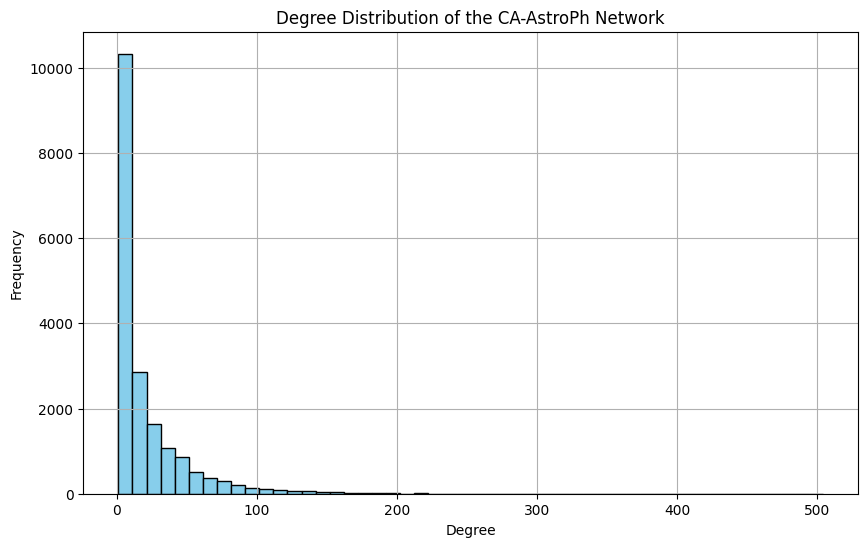

In [225]:
# New plot: Degree distribution of the whole graph
degree_sequence = [deg for node, deg in graph.degree()]
plt.figure(figsize=(10, 6))
plt.hist(degree_sequence, bins=50, color='skyblue', edgecolor='black')
plt.title("Degree Distribution of the CA-AstroPh Network")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

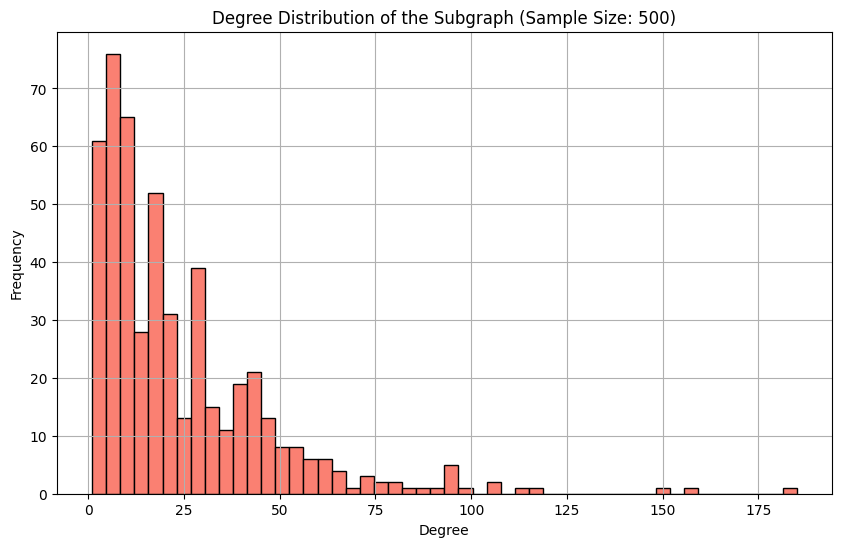

In [226]:
# New plot: Degree distribution for the subgraph
subgraph_degree_sequence = [deg for node, deg in subgraph.degree()]
plt.figure(figsize=(10, 6))
plt.hist(subgraph_degree_sequence, bins=50, color='salmon', edgecolor='black')
plt.title("Degree Distribution of the Subgraph (Sample Size: 500)")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# **Clustering Coefficient for all graph**

In [240]:
# Clustering Coefficient for all graph
clustering_coefficients = nx.clustering(graph)
avg_clustering = np.mean(list(clustering_coefficients.values()))

print(f"\nAverage Clustering Coefficient of the graph: {avg_clustering:.5f}")


Average Clustering Coefficient of the graph: 0.63059


In [241]:
# Display Clustering Coefficients for the first few nodes
print("\nClustering Coefficients for the first few nodes:")
for node in list(clustering_coefficients.keys())[:10]:
    print(f"Node {node}: Clustering Coefficient = {clustering_coefficients[node]:.5f}")

# Convert clustering coefficient dictionary to DataFrame for better readability
clustering_df = pd.DataFrame(list(clustering_coefficients.items()), columns=["Node", "Clustering Coefficient"])

# Display the DataFrame
print("\nClustering Coefficients for All Nodes:")
print(clustering_df)


Clustering Coefficients for the first few nodes:
Node 84424: Clustering Coefficient = 0.07568
Node 276: Clustering Coefficient = 0.11613
Node 1662: Clustering Coefficient = 0.24142
Node 5089: Clustering Coefficient = 1.00000
Node 6058: Clustering Coefficient = 0.22921
Node 6229: Clustering Coefficient = 0.12427
Node 10639: Clustering Coefficient = 0.11879
Node 16442: Clustering Coefficient = 0.31494
Node 19325: Clustering Coefficient = 0.13085
Node 19834: Clustering Coefficient = 1.00000

Clustering Coefficients for All Nodes:
         Node  Clustering Coefficient
0       84424                0.075676
1         276                0.116129
2        1662                0.241417
3        5089                1.000000
4        6058                0.229213
...       ...                     ...
18767   32673                1.000000
18768   40403                0.000000
18769   36753                0.000000
18770   38713                0.000000
18771  129005                0.000000

[18772 ro

# **Nodes with highest and lowest clustering coefficient**

In [230]:
#  Nodes with highest and lowest clustering coefficient
max_clust_node = max(clustering_coefficients, key=clustering_coefficients.get)
min_clust_node = min(clustering_coefficients, key=clustering_coefficients.get)
print(f"\nNode with highest Clustering Coefficient: Node {max_clust_node} ({clustering_coefficients[max_clust_node]:.5f})")
print(f"Node with lowest Clustering Coefficient: Node {min_clust_node} ({clustering_coefficients[min_clust_node]:.5f})")



Node with highest Clustering Coefficient: Node 5089 (1.00000)
Node with lowest Clustering Coefficient: Node 37861 (0.00000)


# **Plotting Clustering Coefficient Distribution**

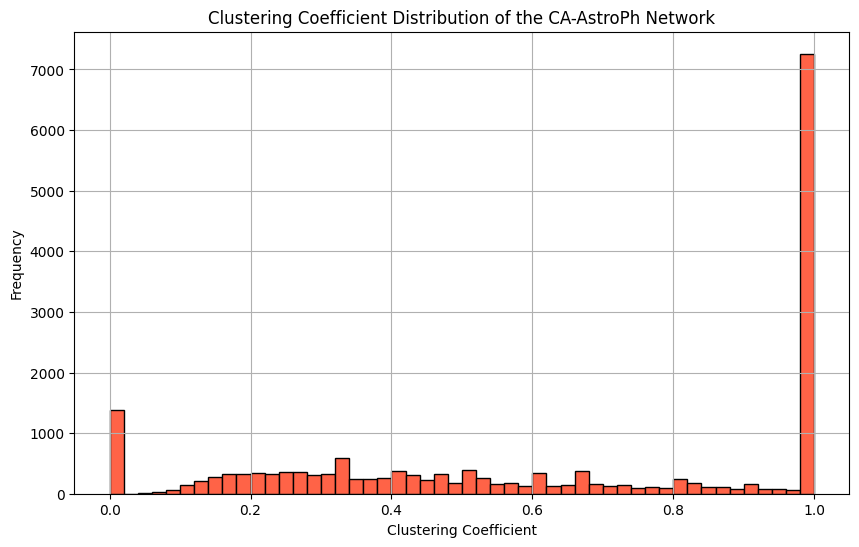

In [242]:
# Plotting Clustering Coefficient Distribution
plt.figure(figsize=(10, 6))
plt.hist(list(clustering_coefficients.values()), bins=50, color='tomato', edgecolor='black')
plt.title("Clustering Coefficient Distribution of the CA-AstroPh Network")
plt.xlabel("Clustering Coefficient")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# **Shortest Path between two random nodes**

In [253]:
# Shortest Path between two random nodes
node1, node2 = np.random.choice(list(graph.nodes()), size=2, replace=False)
shortest_path = nx.shortest_path(graph, source=node1, target=node2)

print(f"\nShortest Path between Node {node1} and Node {node2}: {shortest_path}")


Shortest Path between Node 98709 and Node 54364: [98709, 117523, 22604, 58243, 65337, 54364]


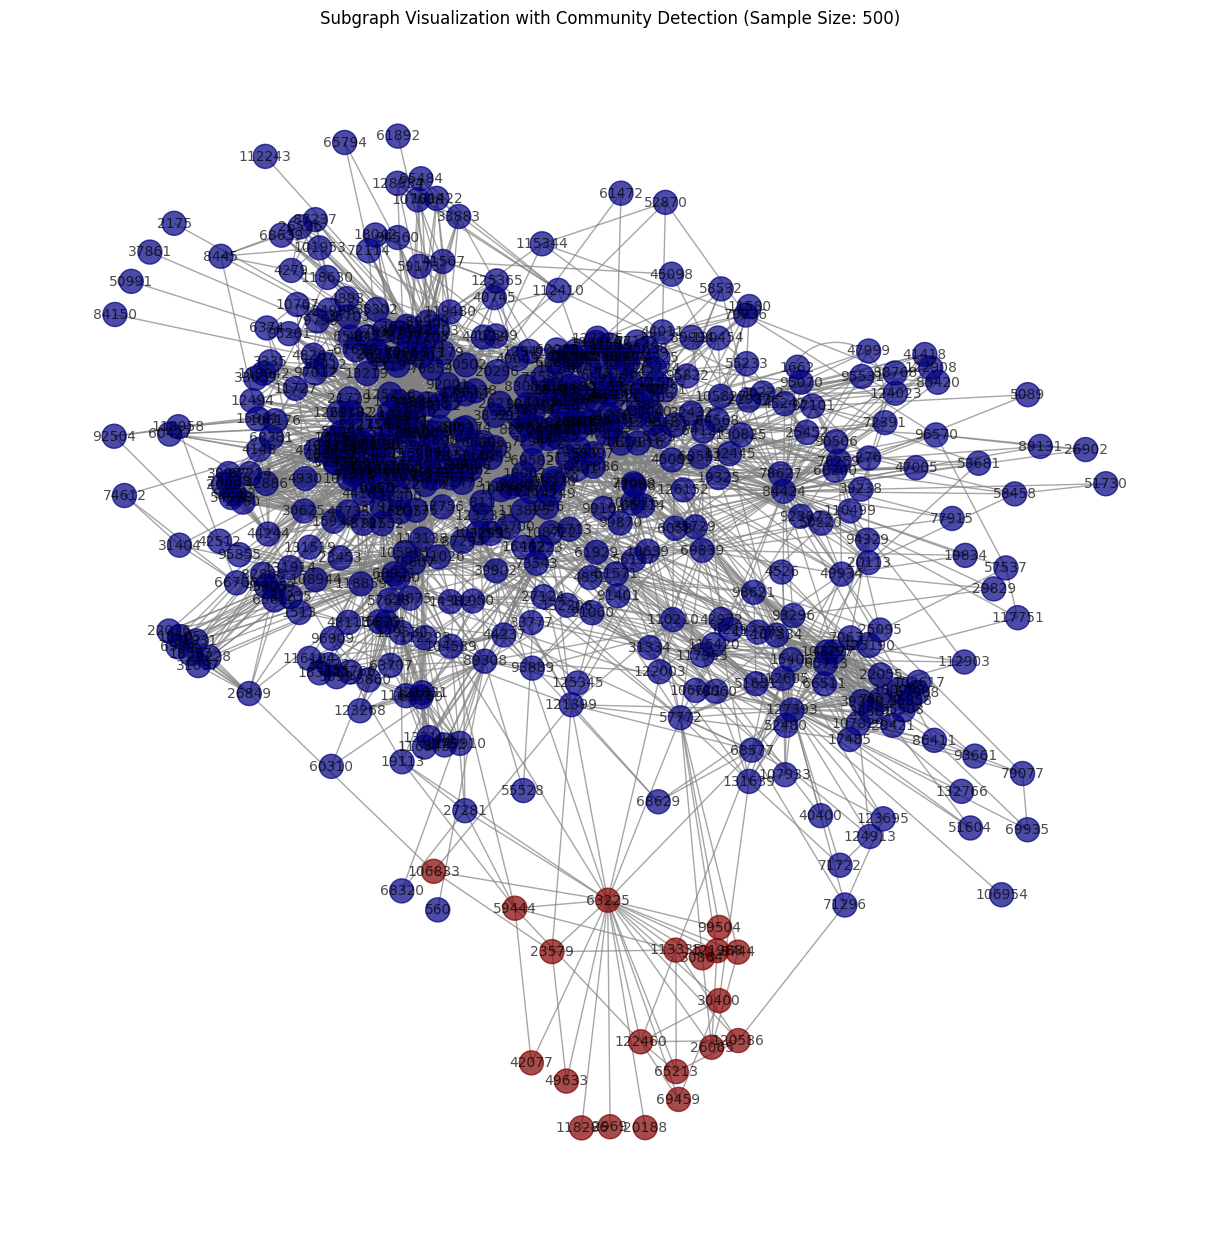

In [254]:
# Visualize the graph with community color coding
plt.figure(figsize=(12, 12))
layout = nx.spring_layout(subgraph)
node_colors = [community_mapping[node] for node in subgraph.nodes()]
nx.draw(subgraph, layout,edge_color='gray', node_color=node_colors, with_labels=True, node_size=300, cmap=plt.cm.jet, font_size=10,alpha=0.7,labels={node: str(node) for node in subgraph.nodes()})# Custom labels
plt.title(f"Subgraph Visualization with Community Detection (Sample Size: {num_sample_nodes})")
plt.show()

# **visualize graph by plotly interactive and show Node ID + Cluster coeff**

In [255]:
import plotly.graph_objects as go
def visualize_graph_with_plotly(subgraph, community_mapping, title="Graph with Communities"):
    """
    Visualizes a graph with Plotly, coloring nodes based on community membership.

    Parameters:
        subgraph: NetworkX Graph object (subset of nodes)
        community_mapping: Dictionary mapping node to community ID
        title: Title of the plot
    """
    # Compute layout for nodes
    pos = nx.spring_layout(subgraph, seed=42)

    # Extract edges and node positions
    edge_x = []     ## x-coordinates of edges
    edge_y = []    ### y-coordinates of edges
    for edge in subgraph.edges():
      # Get positions for the start and end of the edge
        x0, y0 = pos[edge[0]]   ### Start node
        x1, y1 = pos[edge[1]]  #### end node
         # Add coordinates for the edge trace (including None to break the line between edges)
        edge_x.extend([x0, x1, None])
        edge_y.extend([y0, y1, None])

# Create the edge trace (lines connecting nodes)
    edge_trace = go.Scatter(
        x=edge_x,
        y=edge_y,
        line=dict(width=0.5, color='#888'),
        hoverinfo='none',
        mode='lines'
    )

    # Create node traces
    node_x = []  ## x-coordinates of nodes
    node_y = []   # y-coordinates of nodes
    node_color = []   ### Color of each node based on community
    node_labels = []
    node_hover_text = []  # Hover text for each node


    for node in subgraph.nodes():
              # Get node position
        x, y = pos[node]
        node_x.append(x)
        node_y.append(y)
        node_color.append(community_mapping[node])  # Community-based color
        node_labels.append(str(node))      # Assign label as the node identifier
         # Add hover info: Node ID and Clustering Coefficient
        hover_text = f"Node: {node}<br>Clustering Coefficient: {clustering_coefficients[node]:.5f}"
        node_hover_text.append(hover_text)


    node_trace = go.Scatter(
        x=node_x,
        y=node_y,
        mode='markers+text',      # Display markers (nodes) with text (labels)
        text=node_labels,     # Add node labels
        textposition="top center",      # Position labels above nodes
        hoverinfo='text',   # Show labels on hover
        hovertext=node_hover_text,  # Assign hover text

        marker=dict(
            size=10,
            color=node_color,
            colorscale='Jet',  # Use Jet colormap
            colorbar=dict(title="Community"),   # Add a colorbar with a title
            showscale=True    # Show the color scale
        )
    )

    # Combine traces into a figure
    fig = go.Figure(data=[edge_trace, node_trace],
                    layout=go.Layout(
                        title=title,
                        titlefont_size=16,
                        showlegend=False,
                        hovermode='closest',

                        margin=dict(b=0, l=0, r=0, t=40),  # Adjust margins
                        xaxis=dict(showgrid=False, zeroline=False),
                        yaxis=dict(showgrid=False, zeroline=False)
                    ))
    fig.show()



# Visualize the graph with Plotly
visualize_graph_with_plotly(subgraph, community_mapping, f"Interactive Subgraph Visualization with Communities (Sample Size: {num_sample_nodes})")
